# Data Analysis Project

### By Rami Abdulmalik & Yaser Alkhayyat

[View Dataset](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024?select=linkedin_job_postings.csv)

In [1]:
# import important libraries
import pandas as pd

### 1. Data Loading and Initial Exploration:
- Load the selected dataset into your preferred data analysis environment.
- Explore the structure of the dataset (number of rows and columns, data types, etc.).
- Examine the first few rows of the dataset to understand its contents.


We start by loading a sample from the original dataset as our dataframe due to large size problems, then save that sample in a csv file.

This process is done only once and is provided just for preview purposes.

In [2]:
# # loading the dataset
# df = pd.read_csv('./data/linkedin_job_postings.csv').sample(250_000)
# df.to_csv('./data/linkedin_job_postings_minimized.csv')

Reading the dataset using `pd.read_csv()` and removing the old indicies.

In [3]:
df = pd.read_csv('./data/linkedin_job_postings_minimized.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df = df.sort_index()

Using `df.info()` and `df.head()` , we can collect some information about the dataset columns and data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   job_link             250000 non-null  object
 1   last_processed_time  250000 non-null  object
 2   got_summary          250000 non-null  object
 3   got_ner              250000 non-null  object
 4   is_being_worked      250000 non-null  object
 5   job_title            250000 non-null  object
 6   company              249999 non-null  object
 7   job_location         249996 non-null  object
 8   first_seen           250000 non-null  object
 9   search_city          250000 non-null  object
 10  search_country       250000 non-null  object
 11  search_position      250000 non-null  object
 12  job_level            250000 non-null  object
 13  job_type             250000 non-null  object
dtypes: object(14)
memory usage: 26.7+ MB


In [5]:
df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/freshman-ba...,2024-01-21 02:28:28.626152+00,t,t,f,Freshman Basketball Coach,Bridgeport Public Schools,"Bridgeport, CT",2024-01-14,Stamford,United States,Head Coach,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/engineering...,2024-01-19 09:45:09.215838+00,t,t,f,ENGINEERING TECHNICIAN 4 - Construction,State of Nevada Division of Human Resource Man...,"Henderson, NV",2024-01-13,Las Vegas,United States,Documentation Engineer,Associate,Onsite
2,https://www.linkedin.com/jobs/view/monitoring-...,2024-01-19 09:45:09.215838+00,f,f,f,"Monitoring Systems Engineer, Senior with Secur...",ClearanceJobs,"San Diego, CA",2024-01-17,Chula Vista,United States,Tool Grinder Ii,Mid senior,Onsite
3,https://ca.linkedin.com/jobs/view/senior-instr...,2024-01-20 13:23:47.582763+00,t,t,f,"Senior Instrumentation & Controls Engineer, Water",Stantec,"Kelowna, British Columbia, Canada",2024-01-14,Kelowna,Canada,Controls Designer,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/academic-pr...,2024-01-19 12:29:39.707367+00,t,t,f,Academic Professional Track (Non-Tenure): Prof...,Texas A&M University,"College Station, TX",2024-01-14,College Park,United States,Educational Resource Coordinator,Mid senior,Onsite


### 2. Data Cleaning:
- Handle missing values appropriately (e.g., imputation, deletion, etc.).
- Check for and handle any duplicate entries.
- Convert categorical variables into the appropriate data type if necessary.

change dates columns data types from object to datetime using `pd.to_datetime()`

In [6]:
df['last_processed_time'] = pd.to_datetime(df['last_processed_time'])
df['first_seen'] = pd.to_datetime(df['first_seen'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             250000 non-null  object             
 1   last_processed_time  250000 non-null  datetime64[ns, UTC]
 2   got_summary          250000 non-null  object             
 3   got_ner              250000 non-null  object             
 4   is_being_worked      250000 non-null  object             
 5   job_title            250000 non-null  object             
 6   company              249999 non-null  object             
 7   job_location         249996 non-null  object             
 8   first_seen           250000 non-null  datetime64[ns]     
 9   search_city          250000 non-null  object             
 10  search_country       250000 non-null  object             
 11  search_position      250000 non-null  object             
 12  jo

Also, The column `is_being_worked` should be boolean.

In [7]:
df['is_being_worked'].value_counts()

is_being_worked
f    249730
t       270
Name: count, dtype: int64

Replacing string (object) values with boolean values.

In [8]:
df['is_being_worked'] = df['is_being_worked'].map({'t':True, 'f':False})

In [9]:
df['is_being_worked'].dtype

dtype('bool')

In [10]:
df['is_being_worked'].value_counts()

is_being_worked
False    249730
True        270
Name: count, dtype: int64

Using `df.info()` we notice the following :
- 1 job has null value in `company` column.
- 4 jobs has null values in `job_location` column. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             250000 non-null  object             
 1   last_processed_time  250000 non-null  datetime64[ns, UTC]
 2   got_summary          250000 non-null  object             
 3   got_ner              250000 non-null  object             
 4   is_being_worked      250000 non-null  bool               
 5   job_title            250000 non-null  object             
 6   company              249999 non-null  object             
 7   job_location         249996 non-null  object             
 8   first_seen           250000 non-null  datetime64[ns]     
 9   search_city          250000 non-null  object             
 10  search_country       250000 non-null  object             
 11  search_position      250000 non-null  object             
 12  jo

Show all rows with null value in `company` column.

In [12]:
df[df['company'].isnull()]

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
196857,https://www.linkedin.com/jobs/view/paralegal-a...,2024-01-19 09:45:09.215838+00:00,t,t,False,Paralegal Assistant,NaN,"Atlanta, GA",2024-01-13,Atlanta,United States,Clerk General,Associate,Onsite


Best replace for null categorical data is the value with most frequent occurance or **the mode**.\
Using `.value_counts()` , we browse all the companies with the same location and position as the job with the null value in `company`. 

In [13]:
df[(df['job_location']=='Atlanta, GA') & (df['search_position']=='Clerk General')]['company'].value_counts()

company
Stars and Strikes Family Entertainment Centers    1
Crestline Hotels & Resorts                        1
Name: count, dtype: int64

There is no mode for the specified criteria. So, we must delete that row with null value using `df.dropna()`

In [14]:
df = df.dropna(subset=['company'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249999 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             249999 non-null  object             
 1   last_processed_time  249999 non-null  datetime64[ns, UTC]
 2   got_summary          249999 non-null  object             
 3   got_ner              249999 non-null  object             
 4   is_being_worked      249999 non-null  bool               
 5   job_title            249999 non-null  object             
 6   company              249999 non-null  object             
 7   job_location         249995 non-null  object             
 8   first_seen           249999 non-null  datetime64[ns]     
 9   search_city          249999 non-null  object             
 10  search_country       249999 non-null  object             
 11  search_position      249999 non-null  object             
 12  job_lev

Show all rows with null value in `job_location` column.

In [16]:
df[df['job_location'].isnull()]

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
21503,https://www.linkedin.com/jobs/view/research-sc...,2024-01-19 09:45:09.215838+00:00,t,t,False,Research Scientist I,Boys Town National Research Hospital,NaN,2024-01-12,Nebraska,United States,Chemist,Mid senior,Onsite
49707,https://www.linkedin.com/jobs/view/travel-rn-c...,2024-01-21 05:44:29.161221+00:00,t,t,False,Travel RN - CVPICU,TactStaff,NaN,2024-01-14,West Memphis,United States,Recruiter,Mid senior,Onsite
168488,https://uk.linkedin.com/jobs/view/recruitment-...,2024-01-20 16:30:08.517081+00:00,t,t,False,Recruitment Resourcer,Adeline Search,NaN,2024-01-14,Warrington,United Kingdom,Recruiter,Associate,Onsite
208425,https://www.linkedin.com/jobs/view/controls-en...,2024-01-19 09:45:09.215838+00:00,t,t,False,Controls Engineer,Gables Search Group,NaN,2024-01-13,New Albany,United States,Controls Designer,Mid senior,Onsite


We browse all jobs offered by the same company as the row with null value in `job_location` column.

In [17]:
boys_company_mask = df['company'] == 'Boys Town National Research Hospital'
tactstaff_mask = df['company'] == 'TactStaff'
adeline_mask = df['company'] == 'Adeline Search'
gables_mask = df['company'] == 'Gables Search Group'

In [18]:
df[boys_company_mask]

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
21503,https://www.linkedin.com/jobs/view/research-sc...,2024-01-19 09:45:09.215838+00:00,t,t,False,Research Scientist I,Boys Town National Research Hospital,NaN,2024-01-12,Nebraska,United States,Chemist,Mid senior,Onsite
29115,https://www.linkedin.com/jobs/view/polysomnogr...,2024-01-20 03:03:43.082015+00:00,t,t,False,Polysomnographic Technologist (Nights),Boys Town National Research Hospital,"Omaha, NE",2024-01-16,Gretna,United States,Respiratory Therapist,Mid senior,Onsite
85134,https://www.linkedin.com/jobs/view/housekeepin...,2024-01-19 09:45:09.215838+00:00,t,t,False,Housekeeping-Hospital - Full Time,Boys Town National Research Hospital,"Omaha, NE",2024-01-13,Nebraska,United States,Housekeeper,Mid senior,Onsite
177347,https://www.linkedin.com/jobs/view/ct-mri-tech...,2024-01-20 07:11:08.540317+00:00,t,t,False,CT/ MRI Technologist,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Nebraska,United States,Scanner,Mid senior,Onsite
203941,https://www.linkedin.com/jobs/view/lpn-outpati...,2024-01-20 11:24:22.271385+00:00,t,t,False,LPN-Outpatient Child & Adolescent Psychiatry C...,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Gretna,United States,Nurse Licensed Practical,Mid senior,Onsite


All jobs from that company is located at 'Omaha, NE'.\
In other words, 'Omaha, NE' is the **mode** for that criteria.

In [19]:
df[boys_company_mask] = df[boys_company_mask].fillna('Omaha, NE')
df[boys_company_mask]

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
21503,https://www.linkedin.com/jobs/view/research-sc...,2024-01-19 09:45:09.215838+00:00,t,t,False,Research Scientist I,Boys Town National Research Hospital,"Omaha, NE",2024-01-12,Nebraska,United States,Chemist,Mid senior,Onsite
29115,https://www.linkedin.com/jobs/view/polysomnogr...,2024-01-20 03:03:43.082015+00:00,t,t,False,Polysomnographic Technologist (Nights),Boys Town National Research Hospital,"Omaha, NE",2024-01-16,Gretna,United States,Respiratory Therapist,Mid senior,Onsite
85134,https://www.linkedin.com/jobs/view/housekeepin...,2024-01-19 09:45:09.215838+00:00,t,t,False,Housekeeping-Hospital - Full Time,Boys Town National Research Hospital,"Omaha, NE",2024-01-13,Nebraska,United States,Housekeeper,Mid senior,Onsite
177347,https://www.linkedin.com/jobs/view/ct-mri-tech...,2024-01-20 07:11:08.540317+00:00,t,t,False,CT/ MRI Technologist,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Nebraska,United States,Scanner,Mid senior,Onsite
203941,https://www.linkedin.com/jobs/view/lpn-outpati...,2024-01-20 11:24:22.271385+00:00,t,t,False,LPN-Outpatient Child & Adolescent Psychiatry C...,Boys Town National Research Hospital,"Omaha, NE",2024-01-14,Gretna,United States,Nurse Licensed Practical,Mid senior,Onsite


We repeat the same process for other jobs.

In [20]:
df[tactstaff_mask]['job_location'].value_counts()

job_location
Saratoga Springs, NY    2
Albuquerque, NM         1
Ste. Genevieve, MO      1
Maumelle, AR            1
Auburn, NY              1
Chattanooga, TN         1
Lima, OH                1
Winston-Salem, NC       1
Benson, AZ              1
Manchester, CT          1
Name: count, dtype: int64

In [21]:
tactstaff_mode = df[tactstaff_mask]['job_location'].value_counts().index[0]
df[tactstaff_mask]= df[tactstaff_mask].fillna(tactstaff_mode)
df[tactstaff_mask].head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
18409,https://www.linkedin.com/jobs/view/travel-rn-o...,2024-01-20 10:53:32.747142+00:00,t,t,False,Travel RN - OR - Operating Room,TactStaff,"Albuquerque, NM",2024-01-14,Albuquerque,United States,Recruiter,Mid senior,Onsite
23146,https://www.linkedin.com/jobs/view/travel-rn-m...,2024-01-20 08:43:27.175406+00:00,t,t,False,Travel RN - Med Surg,TactStaff,"Ste. Genevieve, MO",2024-01-14,Kaskaskia,United States,Recruiter,Mid senior,Onsite
35655,https://www.linkedin.com/jobs/view/travel-rn-b...,2024-01-19 09:45:09.215838+00:00,t,t,False,Travel RN - Behavioral Health,TactStaff,"Maumelle, AR",2024-01-12,Little Rock,United States,Christian Science Nurse,Mid senior,Onsite
49707,https://www.linkedin.com/jobs/view/travel-rn-c...,2024-01-21 05:44:29.161221+00:00,t,t,False,Travel RN - CVPICU,TactStaff,"Saratoga Springs, NY",2024-01-14,West Memphis,United States,Recruiter,Mid senior,Onsite
84236,https://www.linkedin.com/jobs/view/travel-rn-l...,2024-01-20 14:13:57.824904+00:00,t,t,False,Travel RN - Labor and Delivery,TactStaff,"Saratoga Springs, NY",2024-01-14,Glens Falls,United States,Recruiter,Mid senior,Onsite


In [22]:
df[adeline_mask]

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
168488,https://uk.linkedin.com/jobs/view/recruitment-...,2024-01-20 16:30:08.517081+00:00,t,t,False,Recruitment Resourcer,Adeline Search,NaN,2024-01-14,Warrington,United Kingdom,Recruiter,Associate,Onsite


In [23]:
df.drop(168488, inplace=True)

In [24]:
df[gables_mask]['job_location'].value_counts()

C:\Users\Yaser\AppData\Local\Temp\ipykernel_9804\1964734965.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[gables_mask]['job_location'].value_counts()


job_location
Los Angeles, CA      6
Atlanta, GA          4
Oklahoma City, OK    4
Columbus, OH         4
Irvine, CA           3
                    ..
Lawrenceville, GA    1
Tulsa, OK            1
Sacramento, CA       1
Bridgeport, CT       1
Green Bay, WI        1
Name: count, Length: 107, dtype: int64

In [25]:
gables_mode = df[gables_mask]['job_location'].value_counts().index[0]
df.loc[gables_mask,'job_location'] = df.loc[gables_mask,'job_location'].fillna(gables_mode)
df[df.index==208425]

C:\Users\Yaser\AppData\Local\Temp\ipykernel_9804\3531824366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gables_mode = df[gables_mask]['job_location'].value_counts().index[0]


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
208425,https://www.linkedin.com/jobs/view/controls-en...,2024-01-19 09:45:09.215838+00:00,t,t,False,Controls Engineer,Gables Search Group,"Los Angeles, CA",2024-01-13,New Albany,United States,Controls Designer,Mid senior,Onsite


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249998 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   job_link             249998 non-null  object             
 1   last_processed_time  249998 non-null  datetime64[ns, UTC]
 2   got_summary          249998 non-null  object             
 3   got_ner              249998 non-null  object             
 4   is_being_worked      249998 non-null  bool               
 5   job_title            249998 non-null  object             
 6   company              249998 non-null  object             
 7   job_location         249998 non-null  object             
 8   first_seen           249998 non-null  datetime64[ns]     
 9   search_city          249998 non-null  object             
 10  search_country       249998 non-null  object             
 11  search_position      249998 non-null  object             
 12  job_lev

We can browse the duplicated data in the dataframe using `df.duplicated()`

In [27]:
df[df.duplicated()]

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type


### 3. Exploratory Data Analysis:
- Conduct univariate analysis to understand the distribution of individual variables (e.g., listing prices, number of reviews, etc.).
- Perform bivariate analysis to explore relationships between variables (e.g., price vs. property type, price vs. neighborhood, etc.).
- Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).
- Calculate summary statistics for relevant variables.

#### Most companies offering jobs
A horizontal bar chart is used to plot the most 20 companies offering jobs along with the number of jobs each company is offering.

<Axes: title={'center': 'Top 20 companies offering jobs'}, xlabel='Number of Jobs', ylabel='Company'>

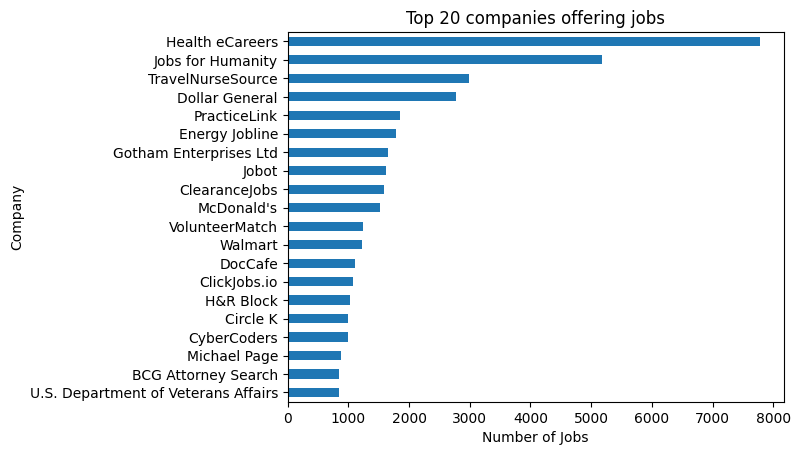

In [129]:
df['company'].value_counts()
df['company'].value_counts().head(20).sort_values().plot(
    kind='barh',
    xlabel='Number of Jobs',
    ylabel='Company',
    title='Top 20 companies offering jobs'
)

#### Most searched cities
A horizontal bar chart is used to plot the top 10 searched cities when searching for jobs.

<Axes: title={'center': 'Top 10 searched cities'}, xlabel='Number of Searches', ylabel='City'>

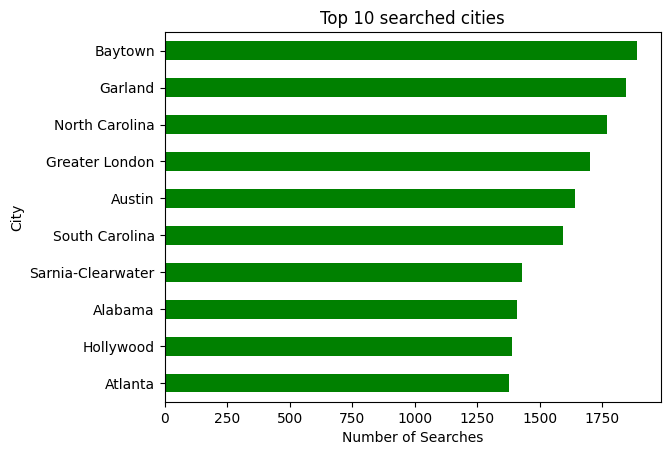

In [133]:
df['search_city'].value_counts()
df['search_city'].value_counts().head(10).sort_values().plot(
    kind='barh',
    xlabel='Number of Searches',
    ylabel='City',
    title='Top 10 searched cities',
    color='green',
    yticks=[tick for tick in range(200,2000,200)]
)

#### Most Available position searched
A horizontal bar chart is used to plot the top 10 available position searched.

<Axes: xlabel='Number of Jobs', ylabel='Top available position searched'>

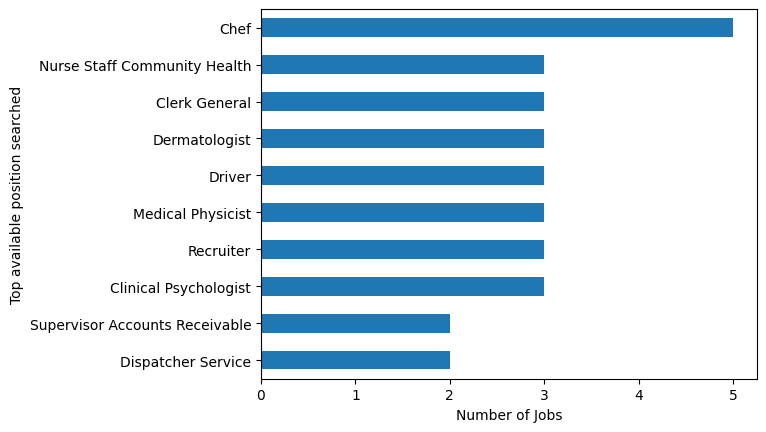

In [171]:
# df['is_being_worked'].value_counts()
# df.loc[df['is_being_worked']==True,'search_position'].value_counts().sum()
df.loc[df['is_being_worked']==True,'search_position'].value_counts().head(10).sort_values().plot(
    kind='barh',
    xlabel='Number of Jobs',
    ylabel='Top available position searched'
)

In [ ]:
## BIVARIATE SOON